# Calculate river tracer concentrations

Based on the classification system with glacial, continental and other rivers, find trace metal concentrations from river data from Manuel Colombo & Kristina Brown (Colombo et al., 2019)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

Load data from paper:

In [2]:
river_names = ['Akpat Kuunga', 'Glacier', 'Marcil Creek', 'Saaqu', 'Devon Isl.', \
               'Cunningham', 'Garnier', 'Mecham', 'Creswell', 'Le Feuvre Inlet', \
               'Pasley', 'Simpson', 'Ellice', 'Tree']
river_lats = [73.7638, 73.6124, 72.9971, 73.7936, 74.5110, \
              74.0153, 73.9445, 74.6926, 72.8491, 72.3412, \
              70.4696, 67.6763, 67.8930, 67.6242]
river_lons = [-80.4468, -78.6805, -84.9864, -86.9829, -88.4910, -93.6242, -92.0369, -94.7783, -93.4162, \
             -96.9172, -95.5796, -100.5683, -104.0758, -111.9161]
river_dmn = [(6.31+6.5)/2, 164, (1.11+1.20)/2, (0.632+0.693)/2, 2.35, \
             (0.366+0.356)/2, 0.218, 0.067, (6.72+7.18)/2, (2.28+4.42)/2, \
             0.923, (51+54)/2, 11, 26] #nM
river_pmn = [10, 151, (6+6.7)/2, (0.756+0.76)/2, 0.553, \
             (0.114+0.099)/2, 11, 0.104, (0.787+2.02)/2, (1.92+0.514)/2, \
             0.115, (22+23)/2, (10+11)/2, (5.17+5.74)/2 ] #microgram/L
river_spm = [8.31, 261, 3.18, np.nan, np.nan, \
             0.85, 13.6, 0.14, 2.43, np.nan, \
             0.03, 19.1, 4.82, np.nan]

# Salinity (PSS78): 0.06, 0.02, 0.03, 0.10, 0.07, 0.11, 0.13, 0.14, 0.16, 0.19, 0.11, 0.09, 0.04, 0.05


Station locations:

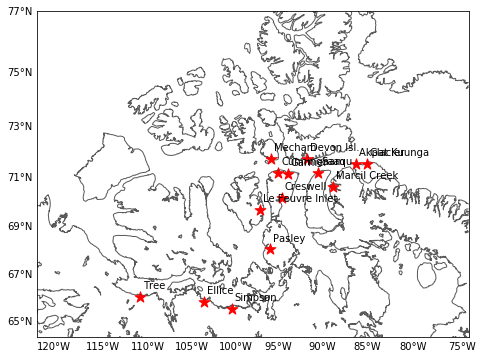

In [3]:
fig,ax = plt.subplots(figsize=(8,6))
proj=Basemap(projection='eqdc',lat_0 = 74, lon_0 = -98, resolution='i', width=2.25e6, height=1.7e6)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

x, y = proj(river_lons, river_lats)
 
proj.scatter(x, y, marker='*',s=130,zorder=3, c='r')

for i, (X, Y) in enumerate(zip(x, y), start=1):
    ax.annotate(river_names[i-1], (X,Y), xytext=(3, 8), textcoords='offset points')

### Groupings:

- Glacial rivers: Glacial River
- Continental rivers: Tree River, Ellice River, Simpson River
- Other rivers: Marcil, Saaqu, Devon Island, Cunningham, Garnier, Mecham, Creswell, Le Feuvre Inlet, Pasle, Akput Kuunga

In [4]:
dMn_glaciers = river_dmn[1]
dMn_other    = np.append(river_dmn[2:11], river_dmn[0])
dMn_cont     = river_dmn[11:14]

spm_glaciers = river_spm[1]
spm_other    = np.append(river_spm[2:11], river_spm[0])
spm_cont     = river_spm[11:14]

In [5]:
dMn_other_ave    = np.average(dMn_other)
dMn_glaciers_ave = np.average(dMn_glaciers)
dMn_cont_ave     = np.average(dMn_cont)

spm_other_ave    = np.nanmean(spm_other)
spm_glaciers_ave = np.nanmean(spm_glaciers)
spm_cont_ave     = np.nanmean(spm_cont)

In [6]:
print('dMn, glaciers: %.2f'%    dMn_glaciers_ave)
print('dMn, continental: %.2f'% dMn_cont_ave)
print('dMn, other: %.2f'%       dMn_other_ave)
print('---------------------------------')
print('spm, glaciers: %.2f'%    spm_glaciers_ave)
print('spm, continental: %.2f'% spm_cont_ave)
print('spm, other: %.2f'%       spm_other_ave)

dMn, glaciers: 164.00
dMn, continental: 29.83
dMn, other: 2.24
---------------------------------
spm, glaciers: 261.00
spm, continental: 11.96
spm, other: 4.08


Average dissolved concentrations:

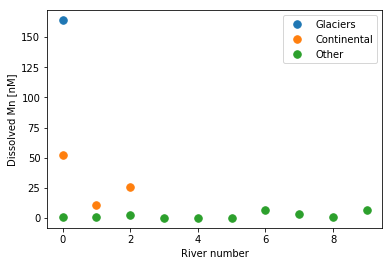

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(dMn_glaciers, '.', markersize=15, label='Glaciers')
ax.plot(dMn_cont,     '.', markersize=15, label='Continental')
ax.plot(dMn_other,    '.', markersize=15, label='Other')

# ax.set_ylim(0,100)
ax.set_ylabel('Dissolved Mn [nM]')
ax.set_xlabel('River number')
ax.legend()

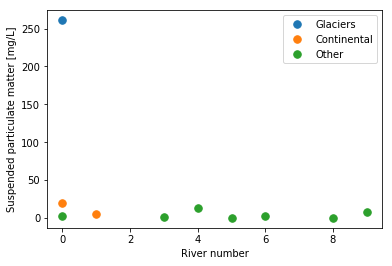

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(spm_glaciers, '.', markersize=15, label='Glaciers')
ax.plot(spm_cont,     '.', markersize=15, label='Continental')
ax.plot(spm_other,    '.', markersize=15, label='Other')

# ax.set_ylim(0,100)
ax.set_ylabel('Suspended particulate matter [mg/L]')
ax.set_xlabel('River number')
ax.legend()